In [1]:
import pandas as pd

In [4]:
datos = pd.read_excel("./Semana04/Información Planta Solar v2.xlsx")

In [7]:
#Buscamos las filas pronosticadas cuyo registro real ya exista
semana = datos[datos["HoraAnio"].between(4344, 4415)]
semana

,dtDia,iCodAno,iCodMes,iNumMes,iCodDiaUniversal,iCodHora,iHoraUniversal,HoraAnio,Generacion,fltTemp,...,fltCoberturaNubes,fltIndiceUV,iCodCondCielo,vchDesCondCielo,iCodDirViento,vchDesDirViento,fltVelocidadRafaga,fltPrecipitacion,fltDPT,fltDPT.1
0,2021-07-01,2021,199,7,6026,144600,0,4344,0.0000,16.0,...,70.0,0.0,4,Cielo nublado,4,Sureste,17.0,0.0,15.0,NaN
1,2021-07-01,2021,199,7,6026,144601,1,4345,0.0000,16.0,...,70.0,0.0,4,Cielo nublado,4,Sureste,15.0,0.0,15.0,NaN
2,2021-07-01,2021,199,7,6026,144602,2,4346,0.0000,16.0,...,70.0,0.0,4,Cielo nublado,4,Sureste,13.0,0.0,15.0,NaN
3,2021-07-01,2021,199,7,6026,144603,3,4347,0.0000,16.0,...,70.0,0.0,3,Medio nublado,4,Sureste,13.0,0.0,16.0,NaN
4,2021-07-01,2021,199,7,6026,144604,4,4348,0.0000,16.0,...,70.0,0.0,3,Medio nublado,4,Sureste,11.0,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16791,2023-07-03,2023,223,7,6758,162187,19,4411,11754.1422,26.9,...,NaN,NaN,1,Despejado,2,Noreste,36.0,0.0,11.6,NaN
16792,2023-07-03,2023,223,7,6758,162188,20,4412,302.8489,23.7,...,NaN,NaN,1,Despejado,3,Este,45.0,0.0,9.5,NaN
16793,2023-07-03,2023,223,7,6758,162189,21,4413,0.0000,21.4,...,NaN,0.0,1,Despejado,3,Este,34.9,0.0,10.7,NaN
16794,2023-07-03,2023,223,7,6758,162190,22,4414,0.0000,16.9,...,NaN,0.0,1,Despejado,4,Sureste,31.0,0.0,12.1,NaN


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
semana[["GenNorm"]] = scaler.fit_transform(semana[["Generacion"]])
semana["GenNorm"]


C:\Users\clau_\AppData\Local\Temp\ipykernel_30240\2193222547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  semana[["GenNorm"]] = scaler.fit_transform(semana[["Generacion"]])


0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
16791    0.393298
16792    0.010133
16793    0.000000
16794    0.000000
16795    0.000000
Name: GenNorm, Length: 216, dtype: float64

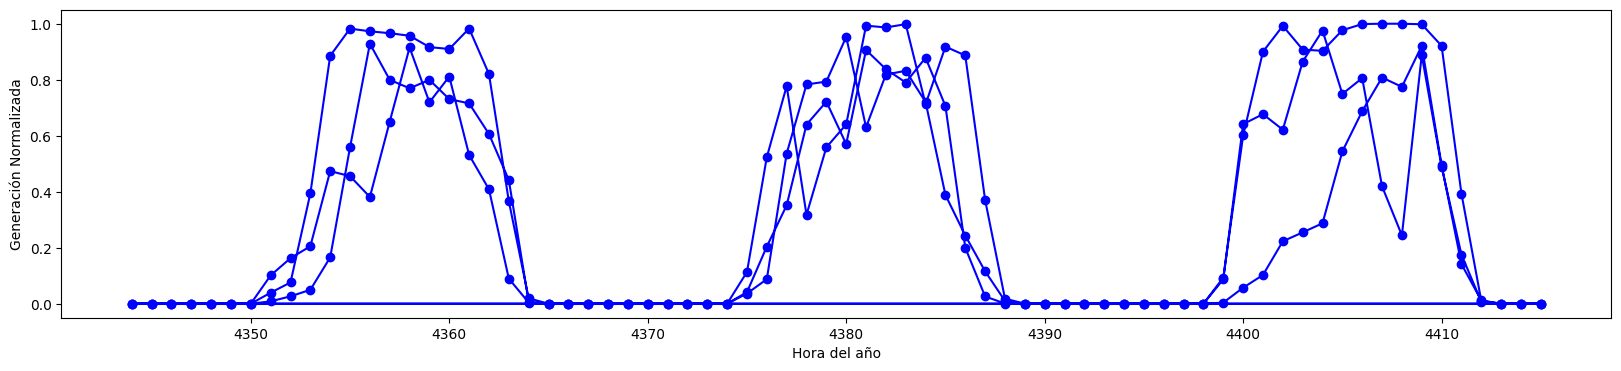

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 4))
plt.plot(semana["HoraAnio"], semana["GenNorm"], color="blue", marker = "o")
plt.xlabel("Hora del año")
plt.ylabel("Generación Normalizada")
plt.show()


In [25]:
from scipy.optimize import curve_fit
import numpy as np

In [29]:
def sin_function(x, b, c):
    return 0.5 * np.cos(b * x + c) + 0.5

In [30]:
params, params_covariance = curve_fit(sin_function, semana["HoraAnio"], semana["GenNorm"], p0=[0.25, -3])
params

array([   0.27240157, -100.2974887 ])

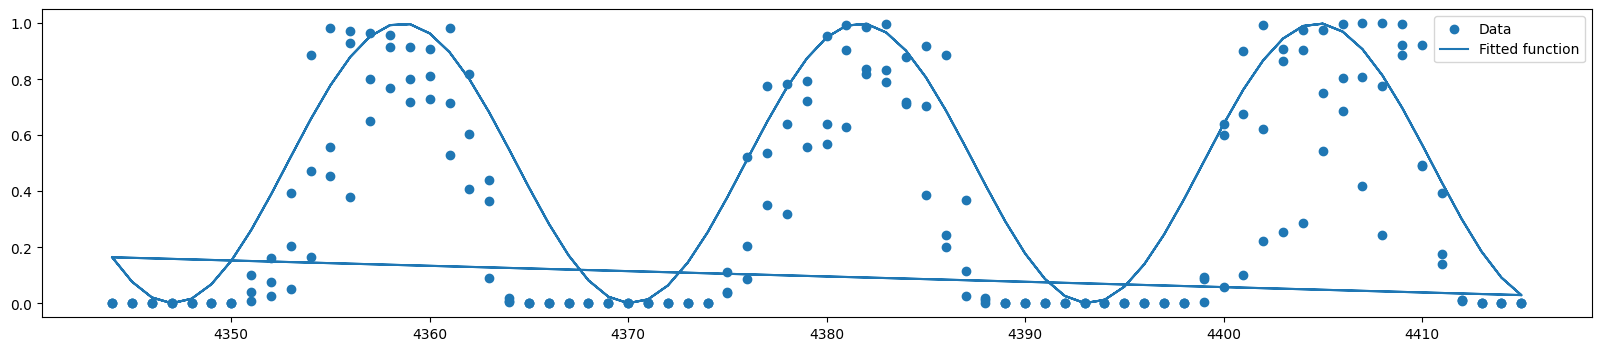

In [31]:
plt.figure(figsize=(20, 4))
plt.scatter(semana["HoraAnio"], semana["GenNorm"], label='Data')
plt.plot(semana["HoraAnio"], sin_function(semana["HoraAnio"], params[0], params[1]),
         label='Fitted function')

plt.legend(loc='best')

plt.show()